<a href="https://colab.research.google.com/github/Bloxx0706/divorce-reason-prediction-using-ANN/blob/main/Divorce_reasons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.12.0

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('kaggle/input/divorce-prediction/divorce_data[1].csv',delimiter = ';')

In [ ]:
df.isnull().all()

Q1         False
Q2         False
Q3         False
Q4         False
Q5         False
Q6         False
Q7         False
Q8         False
Q9         False
Q10        False
Q11        False
Q12        False
Q13        False
Q14        False
Q15        False
Q16        False
Q17        False
Q18        False
Q19        False
Q20        False
Q21        False
Q22        False
Q23        False
Q24        False
Q25        False
Q26        False
Q27        False
Q28        False
Q29        False
Q30        False
Q31        False
Q32        False
Q33        False
Q34        False
Q35        False
Q36        False
Q37        False
Q38        False
Q39        False
Q40        False
Q41        False
Q42        False
Q43        False
Q44        False
Q45        False
Q46        False
Q47        False
Q48        False
Q49        False
Q50        False
Q51        False
Q52        False
Q53        False
Q54        False
Divorce    False
dtype: bool

<Axes: xlabel='Divorce', ylabel='None'>

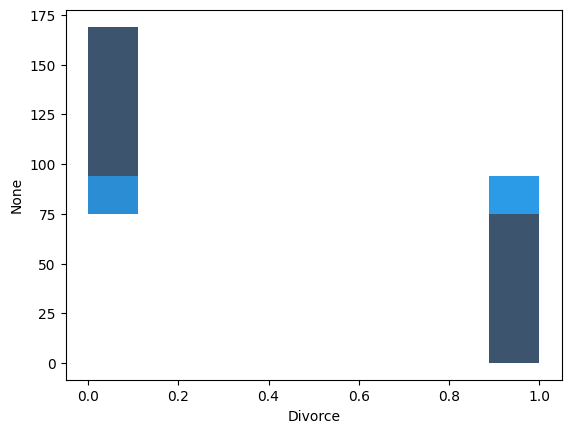

In [ ]:
sns.histplot(x=df['Divorce'],y=df.index)

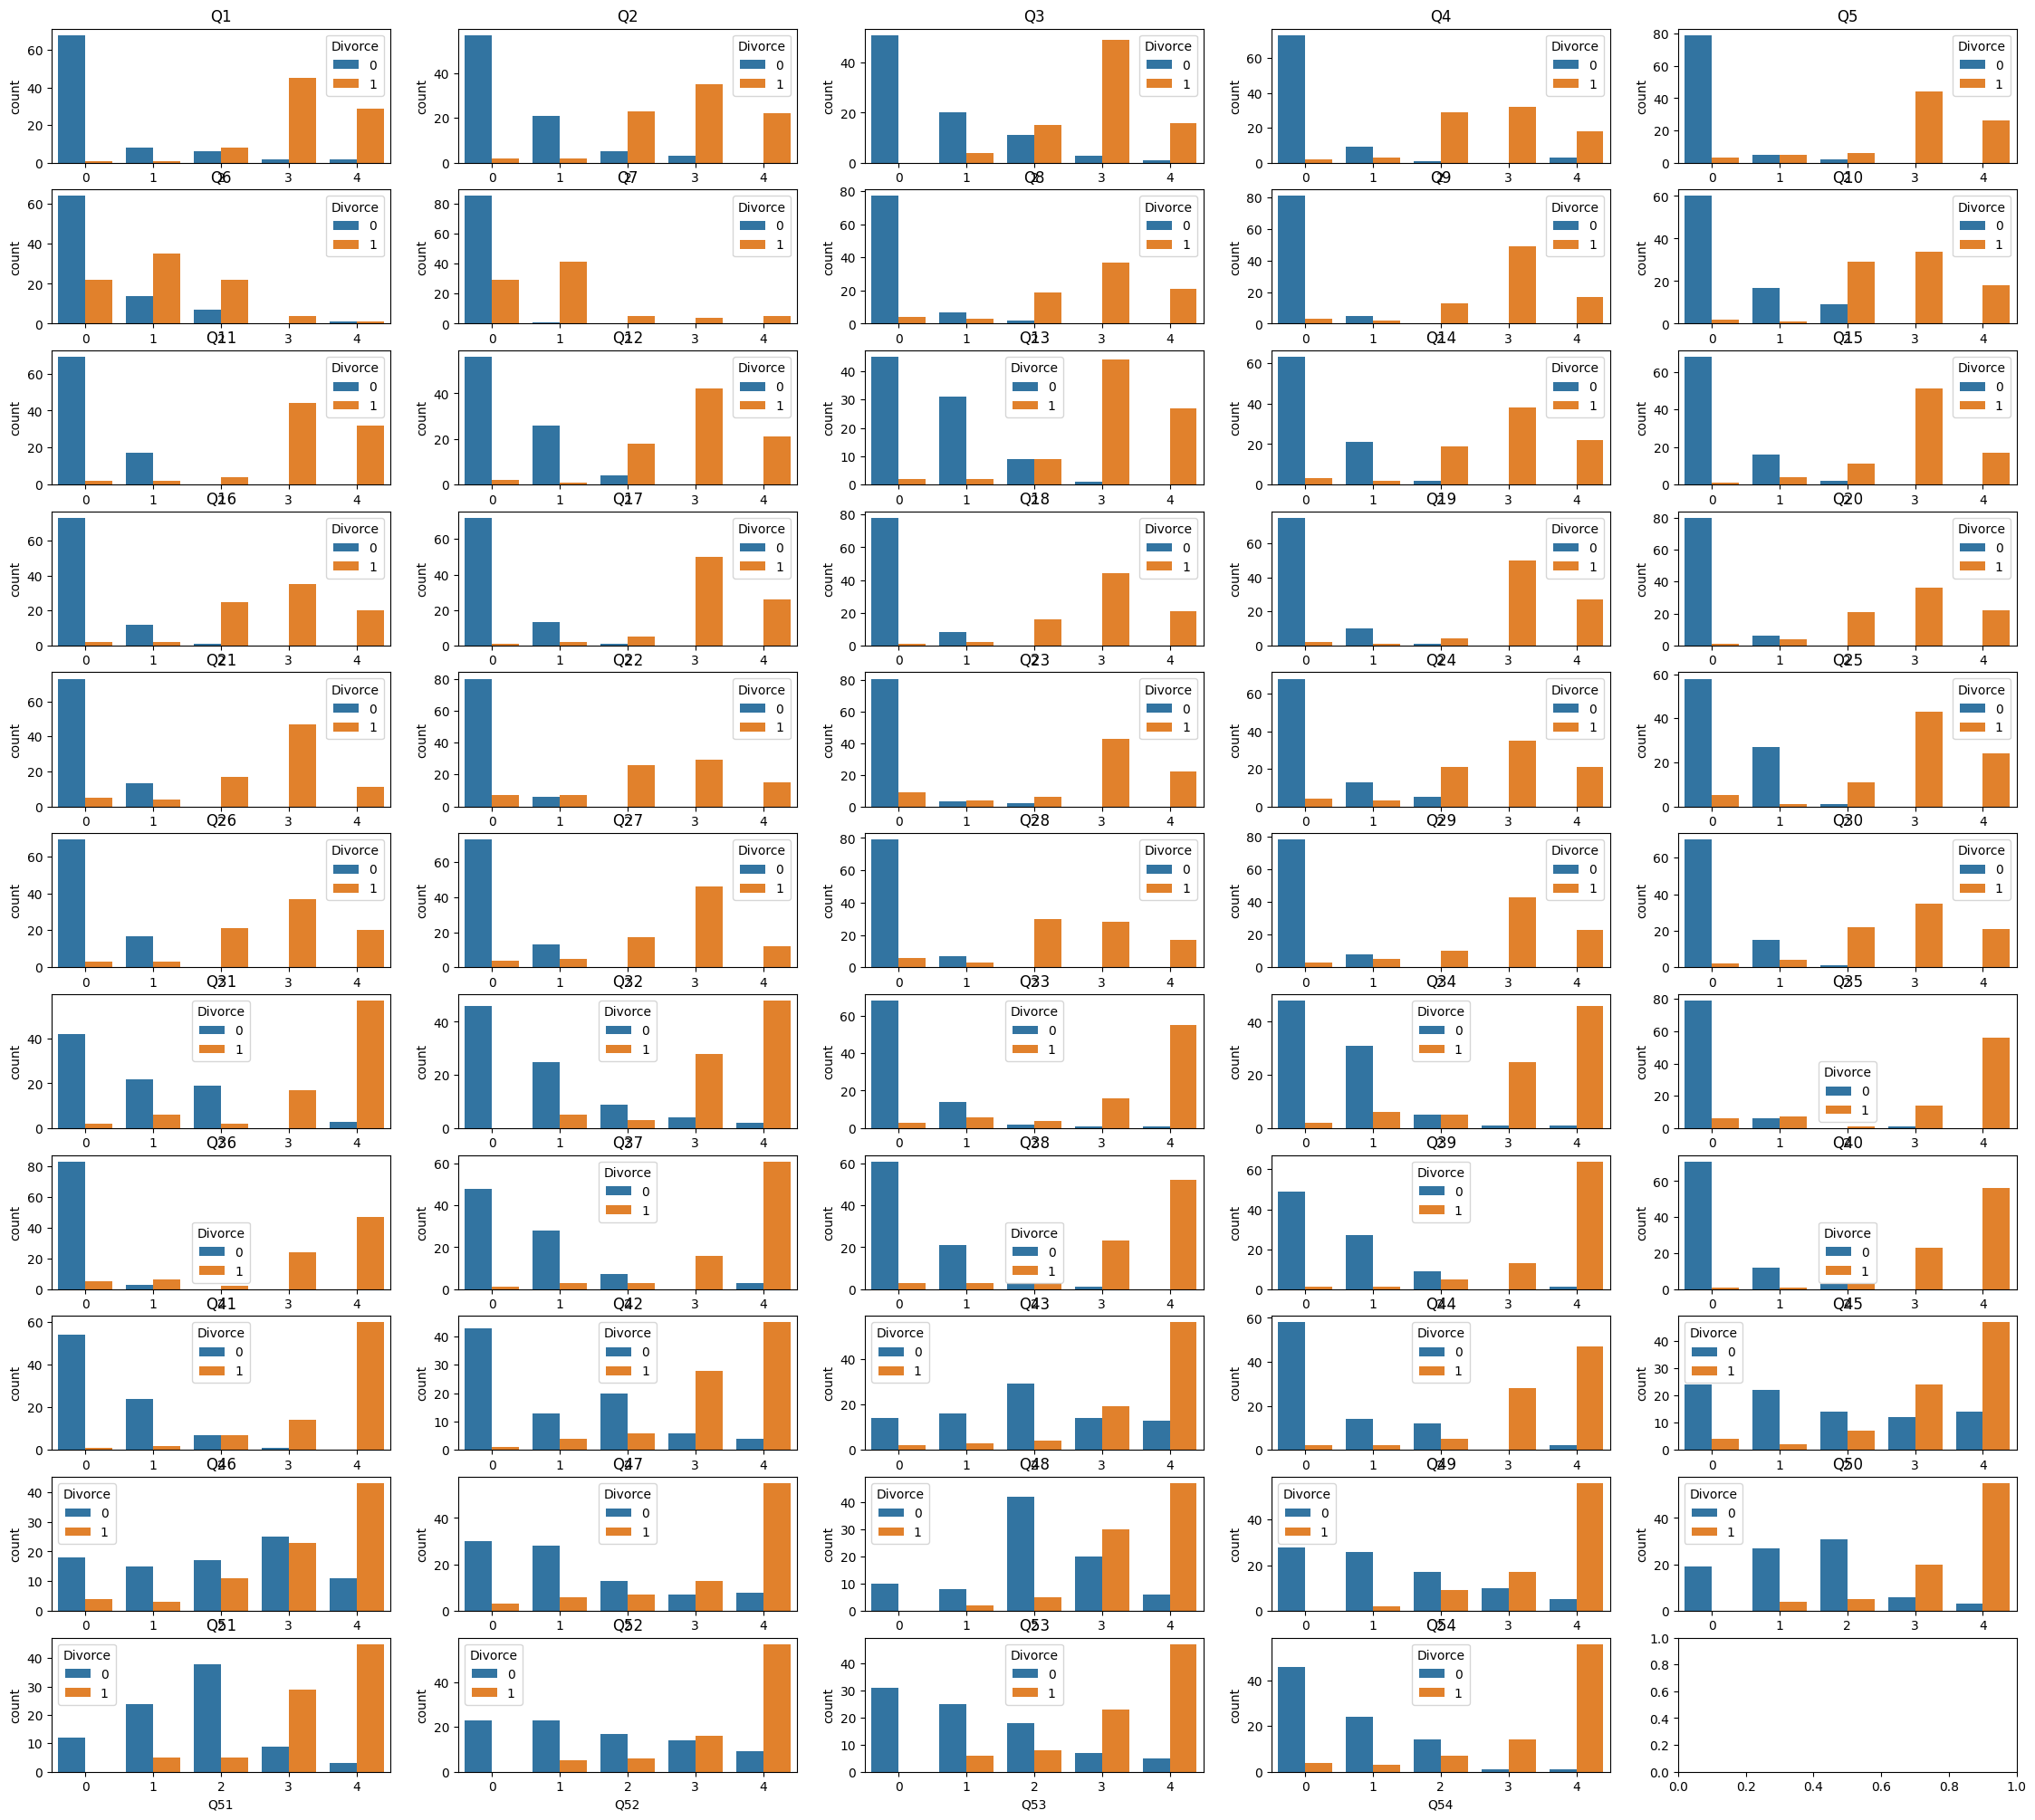

In [ ]:
# data visualization by Divorce stuation
fig, axes = plt.subplots(11,5,figsize=(28,25))
s=0
for i in range(0,11):
    for j in range(0,5):
        s+=1
        if s==55:
            break
        sns.countplot(ax = axes[i,j],x=f'Q{s}',data=df,hue='Divorce')
        axes[i,j].set_title(f'Q{s}')

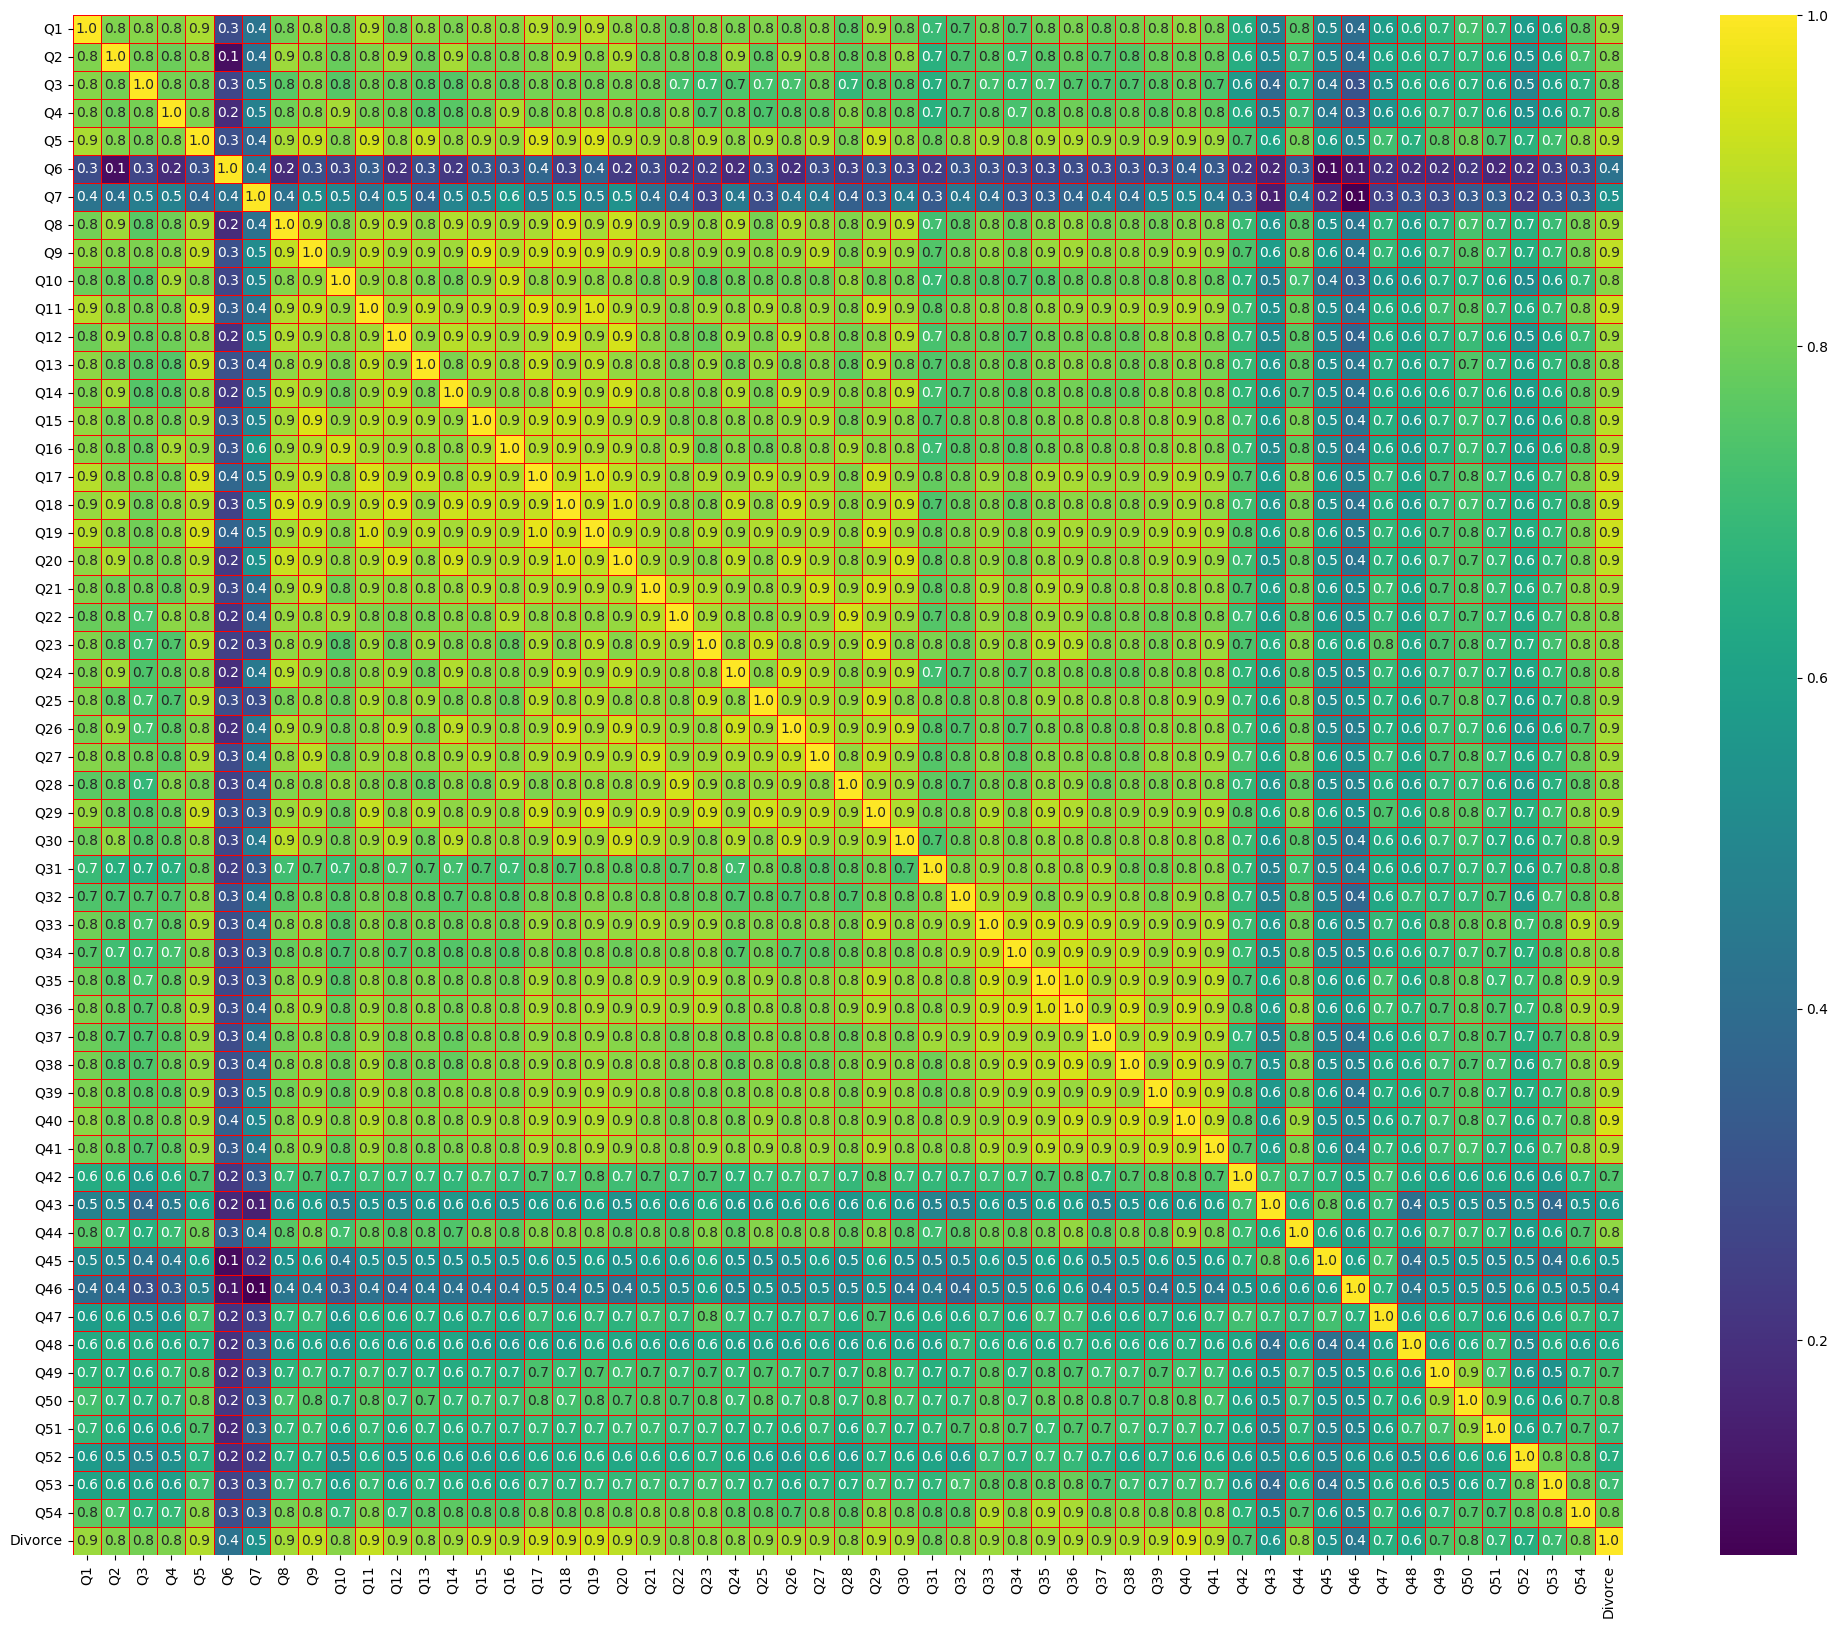

In [ ]:
f,ax = plt.subplots(figsize=(25, 20))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

In [ ]:
X = df.drop('Divorce',axis =1)
Y = df['Divorce']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)



In [ ]:
# Evaluating the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential # initialize neural network library
from tensorflow.keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 50)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 2)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

<ipython-input-10-9e0706579e80>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 50)


Epoch 1/50
3/3 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.9861
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.9861
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.6908 - accuracy: 0.9861
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.9861
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6878 - accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 1.0000
Epoch 9/50
3/3 [==============================] - 0s 9ms/step - loss: 0.6792 - accuracy: 1.0000
Epoch 10/50
3/3 [==============================] - 0s 11ms/step - loss: 0.6746 - accuracy: 1.0000
Epoch 11/50
3/3 [====================